In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns
import math

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\users\mclaflin\Desktop\movies.csv')

In [2]:
# checking current number of records
print(len(df.index))

# drop all duplicates
df = df.drop_duplicates()

# check new number of recrods
print(len(df.index))

#dropping rows where columns have na value to avoid influencing analysis
df = df.dropna()

# checking new number of records
print(len(df.index))

## resetting the indexes
df = df.reset_index()
df = df.drop(columns = ['index'])

7668
5421


In [83]:
df

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
16                                               9 to 5         PG     Comedy   
17                                              The Fog          R     Horror   
18                                             Cruising          R      Crime   
19                                        Heaven's Gate          R  Adventure   
20                                  The Final Countdown         PG     Action   
21                                               Xanadu         PG    Fantasy   
22                                             Brubaker          R      Crime   
23                                      American Gigolo          R      Crime   
24                     Cattle Annie and Little Britches         PG      Drama   
25                                     Private Benjamin          R     Comedy   
26                                The Hollywood Knights          R     Comedy   
27                                           Motel Hell          R     Comedy   
28                                        The Stunt Man          R     Action   
29                                           The Island          R     Action   
30                                        The Nude Bomb         PG     Action   
31                                    Stardust Memories         PG     Comedy   
32                                    Melvin and Howard          R     Comedy   
33                                         Bronco Billy         PG     Action   
34                                 When Time Ran Out...         PG     Action   
35                                      Oh Heavenly Dog         PG     Comedy   
36                                          The Octagon          R     Action   
37                        The Last Flight of Noah's Ark          G  Adventure   
38                                        Willie & Phil          R     Comedy   
39                                               Phobia          R      Drama   
40        Indiana Jones and the Raiders of the Lost Ark         PG     Action   
41                       An American Werewolf in London          R     Comedy   
42                                 Escape from New York          R     Action   
43                                        The Evil Dead      NC-17     Horror   
44                                              Porky's          R     Comedy   
45                                             Blow Out          R      Crime   
46                                  Clash of the Titans         PG     Action   
47                                            Excalibur          R  Adventure   
48                                            Mad Max 2          R     Action   
4

In [3]:
## check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [4]:
## data types in columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [16]:
### cleaning data

## changing data types

df['budget'] = df['budget'].astype(int)
df['gross'] = df['gross'].astype(int)

## setting gross values to abs
df['AbsGross'] = df['gross'].apply(abs)

In [19]:
## dropping old gross column
df = df.drop(columns = ['gross'])

In [9]:
pd.set_option('display.max_rows', None)

In [20]:
df.sort_values(by=['AbsGross'], inplace=False, ascending=False)

name     rating   genre  year  \
5302                           Avengers: Endgame      PG-13  Action  2019   
1795                                     Titanic      PG-13   Drama  1997   
3731                                      Avatar      PG-13  Action  2009   
4730  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
5158                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
3898                                 Tanner Hall          R   Drama  2009   
1378                  Philadelphia Experiment II      PG-13  Action  1993   
2286                                Ginger Snaps  Not Rated   Drama  2000   
154                                     Parasite          R  Horror  1982   
1920                                  Trojan War      PG-13  Comedy  1997   

                               released  score      votes  \
5302     April 26, 2019 (United States)    8.4   903000.0   
1795  December 19, 1997 (United States)    7.8  1100000.0   
3731  December 18, 2009 (United States)    7.8  1100000.0   
4730  December 18, 2015 (United States)    7.8   876000.0   
5158     April 27, 2018 (United States)    8.4   897000.0   
...                                 ...    ...        ...   
3898          January 15, 2015 (Sweden)    5.8     3500.0   
1378         June 4, 1994 (South Korea)    4.5     1900.0   
2286              May 11, 2001 (Canada)    6.8    43000.0   
154      March 12, 1982 (United States)    3.9     2300.0   
1920           October 1, 1997 (Brazil)    5.7     5800.0   

                 director                   writer               star  \
5302        Anthony Russo       Christopher Markus  Robert Downey Jr.   
1795        James Cameron            James Cameron  Leonardo DiCaprio   
3731        James Cameron            James Cameron    Sam Worthington   
4730          J.J. Abrams          Lawrence Kasdan       Daisy Ridley   
5158        Anthony Russo       Christopher Markus  Robert Downey Jr.   
...                   ...                      ...                ...   
3898  Francesca Gregorini  Tatiana von Fürstenberg        Rooney Mara   
1378     Stephen Cornwell       Wallace C. Bennett       Brad Johnson   
2286         John Fawcett             Karen Walton      Emily Perkins   
154          Charles Band            Alan J. Adler    Robert Glaudini   
1920         George Huang                Andy Burg       Will Friedle   

            country     budget                    company  runtime    AbsGross  
5302  United States  356000000             Marvel Studios    181.0  2147483648  
1795  United States  200000000      Twentieth Century Fox    194.0  2147483648  
3731  United States  237000000      Twentieth Century Fox    162.0  2147483648  
4730  United States  245000000                  Lucasfilm    138.0  2069521700  
5158  United States  321000000             Marvel Studios    149.0  2048359754  
...             ...        ...                        ...      ...         ...  
3898  United States    3000000           Two Prong Lesson     96.0        5073  
1378  United States    5000000           Trimark Pictures     97.0        2970  
2286         Canada    5000000  Copperheart Entertainment    108.0        2554  
154   United States     800000           Embassy Pictures     85.0        2270  
1920  United States   15000000                   Daybreak     85.0         309  

[5421 rows x 15 columns]

In [ ]:
# PREDICTIONS
# budget high correlation
# company high correlation

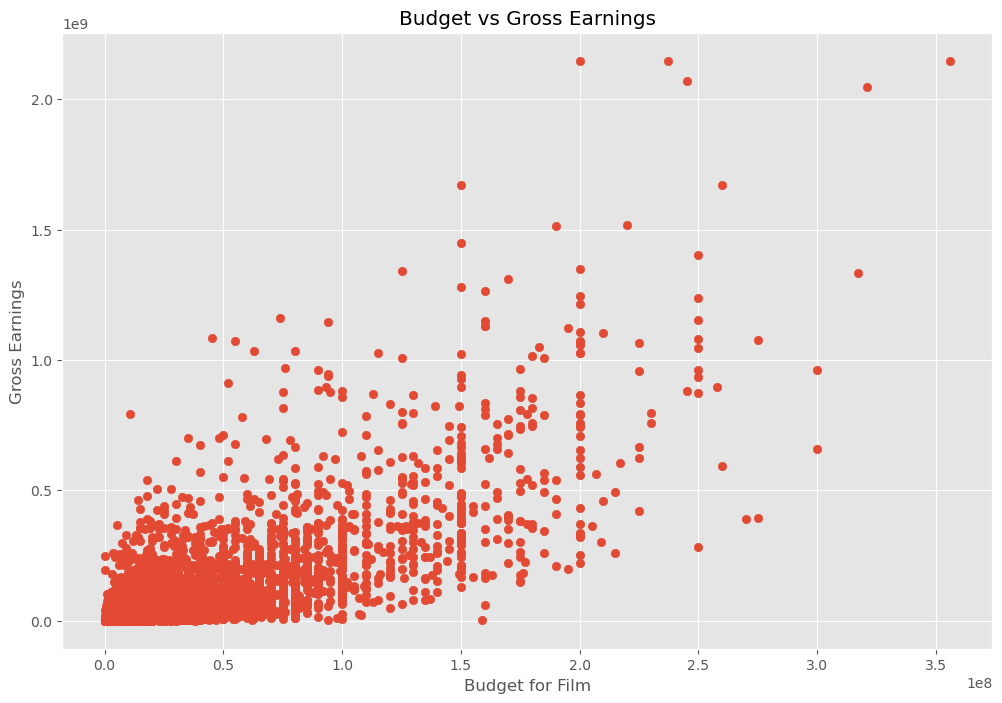

In [21]:
## scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['AbsGross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='AbsGross'>

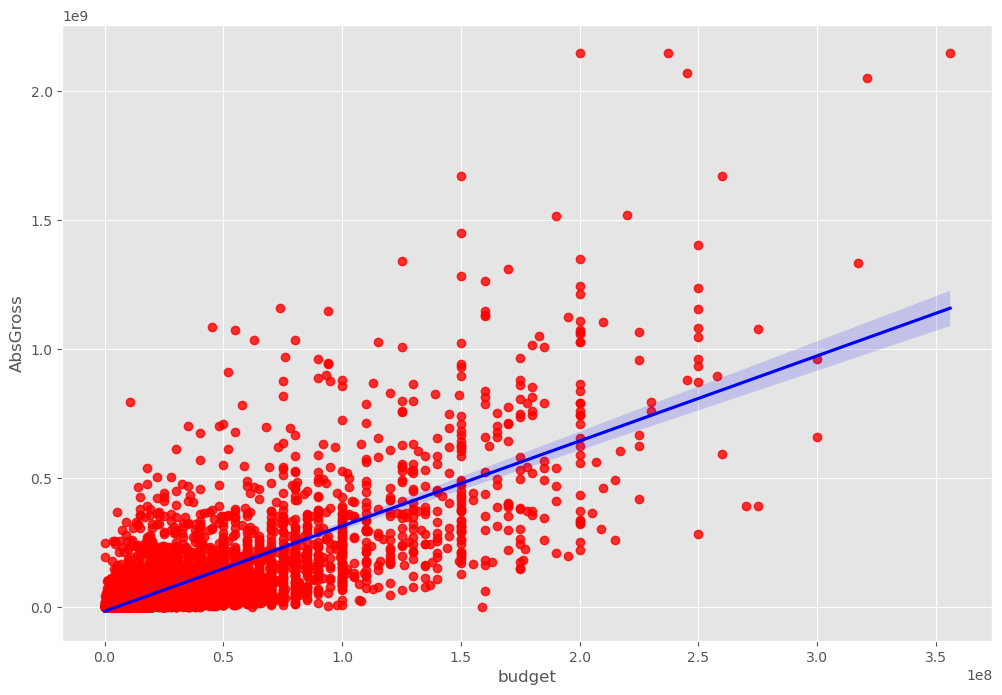

In [23]:
# seaborn plot
# plotting budget vs gross 

sns.regplot(x='budget',y='AbsGross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [24]:
### looking at correlation
## different methods are: pearson, kendall, and spearman

df.corr() 

year     score     votes    budget   runtime  AbsGross
year      1.000000  0.056386  0.206021  0.327722  0.075077  0.277715
score     0.056386  1.000000  0.474256  0.072001  0.414068  0.224092
votes     0.206021  0.474256  1.000000  0.439675  0.352303  0.618978
budget    0.327722  0.072001  0.439675  1.000000  0.318695  0.744928
runtime   0.075077  0.414068  0.352303  0.318695  1.000000  0.275789
AbsGross  0.277715  0.224092  0.618978  0.744928  0.275789  1.000000

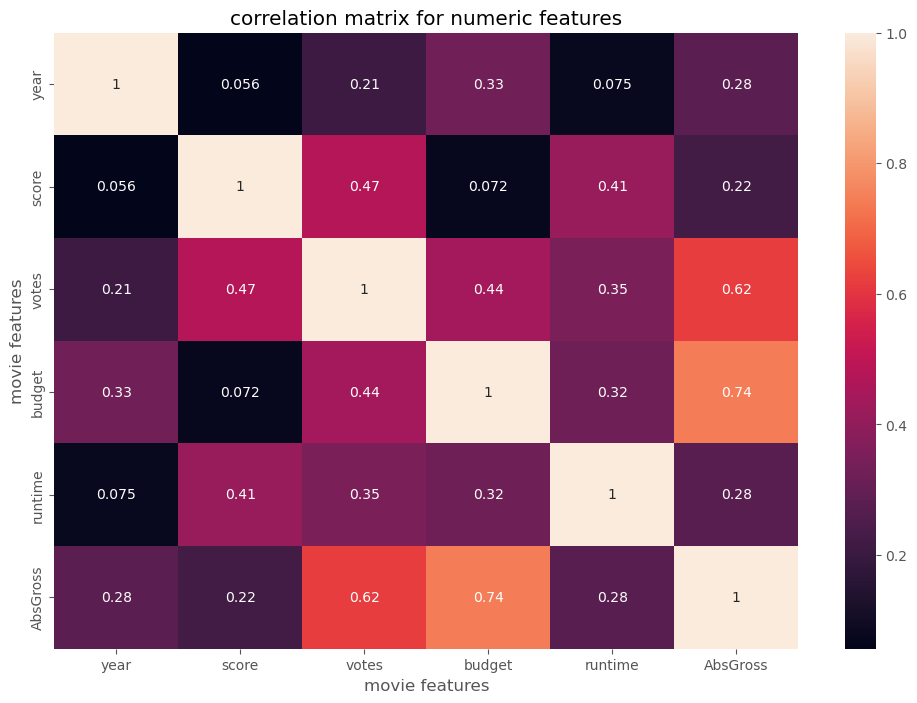

In [25]:
# visualize the correlation matrix

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('correlation matrix for numeric features')
plt.xlabel('movie features')
plt.ylabel('movie features')

plt.show()

In [26]:
### look at company

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
0     4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1     3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2     3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3      204       4      4  1980      1127    7.7   221000.0       889    1413   
4      732       6      4  1980      1170    7.3   108000.0       719     351   
...    ...     ...    ...   ...       ...    ...        ...       ...     ...   
5416   415       6      0  2020       904    6.6   140000.0        16    2390   
5417  3556       4      0  2020       713    6.5   102000.0       852    2309   
5418  1153       4      1  2020       904    5.6    53000.0      1809    2827   
5419  3978       4      1  2020       758    6.8    42000.0       294    2091   
5420  4090       3      0  2020       370    6.8     3700.0       746    1184   

      star  country     budget  company  runtime   AbsGross  
0      699       46   19000000     1426    146.0   46998772  
1      214       47    4500000      452    104.0   58853106  
2     1157       47   18000000      945    124.0  538375067  
3     1474       47    3500000     1108     88.0   83453539  
4      271       47    6000000     1083     98.0   39846344  
...    ...      ...        ...      ...      ...        ...  
5416  1812       47   90000000      452    124.0  426505244  
5417   147       47   85000000     1108     99.0  319715683  
5418  1470       47  175000000     1397    101.0  245487753  
5419   640        6  135000000       12    100.0  111105497  
5420  1839        8   80000000      228    149.0  461421559  

[5421 rows x 15 columns]

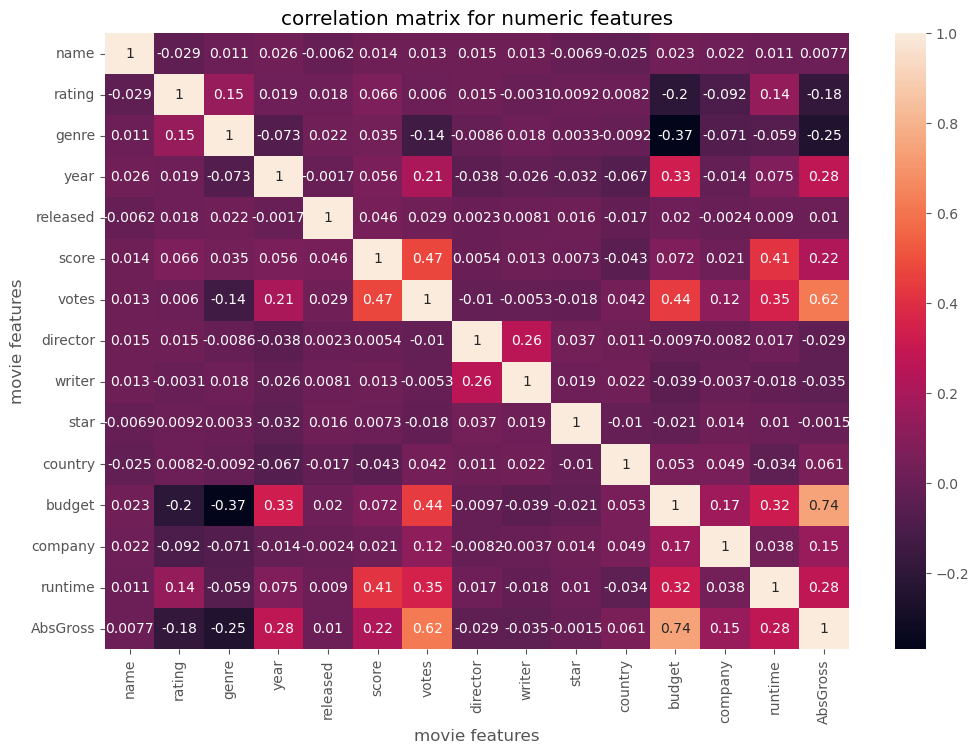

In [27]:
# visualize the correlation matrix

correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('correlation matrix for numeric features')
plt.xlabel('movie features')
plt.ylabel('movie features')

plt.show()

In [28]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name      1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating   -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre     0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year      0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score     0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes     0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director  0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer    0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star     -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country  -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget    0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
company   0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime   0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   
AbsGross  0.007668 -0.184872 -0.246831  0.277715  0.010430  0.224092   

             votes  director    writer      star   country    budget  \
name      0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating    0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre    -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year      0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released  0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score     0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes     1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer   -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star     -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country   0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget    0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
company   0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime   0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   
AbsGross  0.618978 -0.028713 -0.035446 -0.001480  0.060676  0.744928   

           company   runtime  AbsGross  
name      0.021697  0.010850  0.007668  
rating   -0.092357  0.140792 -0.184872  
genre    -0.071334 -0.059237 -0.246831  
year     -0.014333  0.075077  0.277715  
released -0.002407  0.008975  0.010430  
score     0.020656  0.414068  0.224092  
votes     0.118470  0.352303  0.618978  
director -0.008223  0.017433 -0.028713  
writer   -0.003697 -0.017561 -0.035446  
star      0.014082  0.010108 -0.001480  
country   0.048569 -0.034477  0.060676  
budget    0.170235  0.318695  0.744928  
company   1.000000  0.037585  0.151295  
runtime   0.037585  1.000000  0.275789  
AbsGross  0.151295  0.275789  1.000000

In [29]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
                        ...   
AbsGross  country     0.060676
          budget      0.744928
          company     0.151295
          runtime     0.275789
          AbsGross    1.000000
Length: 225, dtype: float64

In [30]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.368523
genre     budget     -0.368523
AbsGross  genre      -0.246831
genre     AbsGross   -0.246831
rating    budget     -0.203946
                        ...   
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
AbsGross  AbsGross    1.000000
Length: 225, dtype: float64

In [31]:
high_corr = sorted_pairs[(sorted_pairs) > .5]

high_corr

AbsGross  votes       0.618978
votes     AbsGross    0.618978
AbsGross  budget      0.744928
budget    AbsGross    0.744928
name      name        1.000000
director  director    1.000000
company   company     1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
AbsGross  AbsGross    1.000000
dtype: float64

In [ ]:
# budget and then votes have the highest correlation to gross earnings 